In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error

Прочитаем базу потребления электроэнергии

In [2]:
#Path_Energy = 'PJME_hourly.csv'
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
data.describe()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000
mean,32079.773047,2009.801340,6.435979,15.722681,2.481241,180.459835,26.218643,2.999168,11.501101,0.027233,0.027075,0.027240
std,6464.167501,4.791885,3.438982,8.801258,1.114448,105.138073,15.019836,1.999572,6.921927,0.162763,0.162303,0.162783
min,14544.000000,2002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27573.000000,2006.000000,3.000000,8.000000,1.000000,90.000000,13.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,31421.000000,2010.000000,6.000000,16.000000,2.000000,179.000000,26.000000,3.000000,12.000000,0.000000,0.000000,0.000000
75%,35648.750000,2014.000000,9.000000,23.000000,3.000000,271.000000,39.000000,5.000000,18.000000,0.000000,0.000000,0.000000
max,62009.000000,2018.000000,12.000000,31.000000,4.000000,366.000000,53.000000,6.000000,23.000000,1.000000,1.000000,1.000000


Сделаем ресемплинг (возьмем среднее по месяцу)

In [4]:
data_m = data.resample('M').mean()

In [5]:
data_m.head(10)

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258
2002-06-30,33585.919444,2002.0,6.0,15.500000,2.0,166.500000,24.333333,3.166667,11.500000,0.000000,0.000000,0.000000
2002-07-31,38041.896505,2002.0,7.0,16.000000,3.0,197.000000,28.741935,2.806452,11.500000,0.032258,0.032258,0.032258
2002-08-31,38014.021505,2002.0,8.0,16.000000,3.0,228.000000,33.129032,3.096774,11.500000,0.000000,0.000000,0.000000
2002-09-30,31281.468056,2002.0,9.0,15.500000,3.0,258.500000,37.500000,3.000000,11.500000,0.033333,0.033333,0.033333


In [6]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

Получим оценку автокорреляции месячной модели по ряду и его первым разностям.

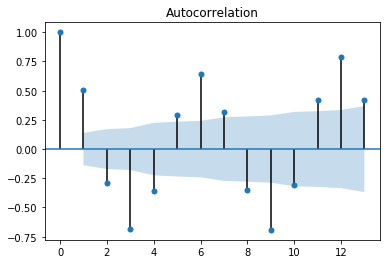

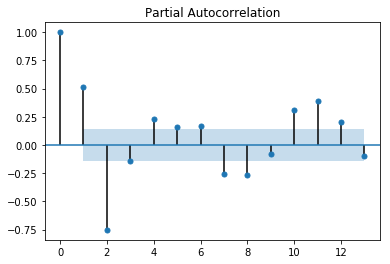

In [7]:
#plt.figure(figsize=(20,8))
#plt.subplot(2,1,1)
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=13)
plt.show()

#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=13)
plt.show()

Видна значительная корреляция с лагом каждые 3 месяца (сезонность).

Применим модель SARIMA

In [8]:
import warnings

# Определим p, d и q 
q = 1
p = 2
d = 2
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
#будем работать с месячными данными, тогда сезонность это 6 месяцев
qs = 4
ps = 0
ds = 1
seasonal_pdq = [ps, ds, qs ,6] 

In [9]:
print('SARIMAX: p,d,q=',pdq,'   : ps,ds,qs, S=', seasonal_pdq)

SARIMAX: p,d,q= [2, 2, 1]    : ps,ds,qs, S= [0, 1, 4, 6]


In [10]:
#для построения модели используем все данные, кроме 6-х последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-6],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[2, 2, 1]x[0, 1, 4, 6] - AIC:2851.1611407333585


In [11]:
print(results.summary().tables[0],results.summary().tables[1])

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  194
Model:             SARIMAX(2, 2, 1)x(0, 1, 4, 6)   Log Likelihood               -1417.581
Date:                           Sun, 26 Jan 2020   AIC                           2851.161
Time:                                   19:43:59   BIC                           2875.763
Sample:                                        0   HQIC                          2861.151
                                           - 194                                         
Covariance Type:                             opg                                         
========================================================================================= ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

Посмотрим на остатки ряда (results.resid) с точки зрения автокорреляции и убедимся, что они не имеют значительной корреляции 

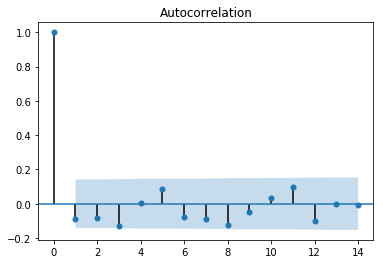

In [12]:
sm.graphics.tsa.plot_acf(results.resid, lags=14)
plt.show()

Оценим близости распределений остатков модели к нормальному закону используя визуализацию plot_diagnostics:

- левый верхний график - остатки ряда

- правый верхний - гистограмма для остатков ряда

- левый нижний - упорядоченное распределение остатков (квантильное)

- правый нижний - коррелограмма остатков

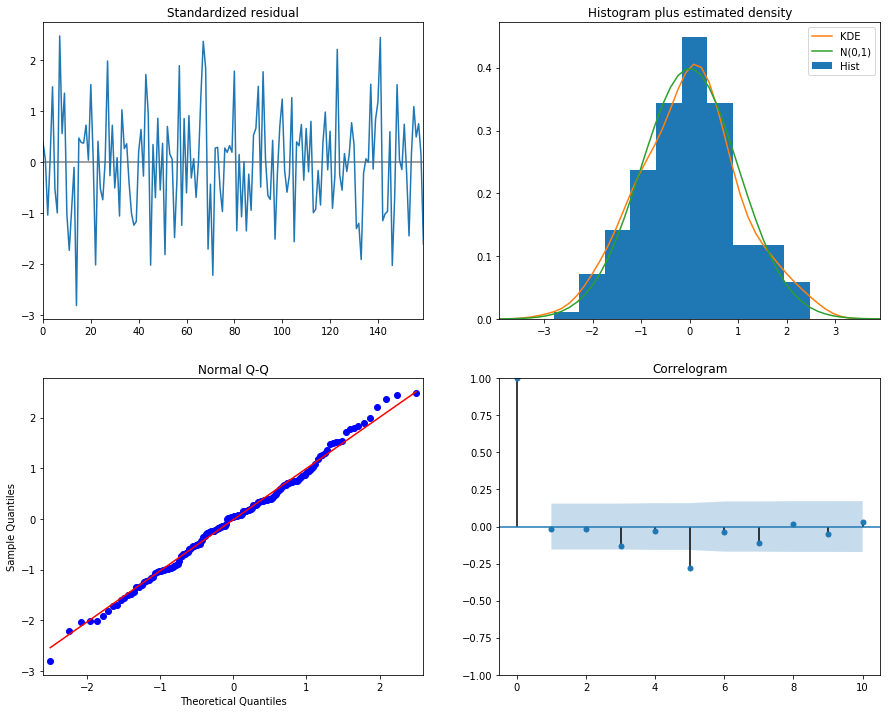

In [13]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

диагностика показала, что остатки модели правильно распределяются:

- estimated density на верхнем-правом графике красная линия KDE находится близко к линии N (0,1) (где N (0,1) является стандартным обозначением нормального распределения со средним 0 и стандартным отклонением 1) . Очевидно, что остатки нормально распределены.

- График q-q в левом нижнем углу показывает, что упорядоченное распределение остатков (синие точки) следует линейному тренду выборок, взятых из стандартного распределения N (0, 1). Опять же, это признак того, что остатки нормально распределены.

- Остатки с течением времени (верхний левый график) не показывают явной сезонности и кажутся белыми шумами. Это подтверждается графиком автокорреляции (внизу справа), который показывает, что остатки временных рядов имеют низкую корреляцию с запаздывающими данными.

Эти графики позволяют сделать вывод о том, что выбранная модель (удовлетворительно) подходит для анализа и прогнозирования данных временных рядов.

Подобрать параметры модели можно используя сеточный выбор 

In [14]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 6)
SARIMAX: (0, 0, 1) x (0, 0, 2, 6)
SARIMAX: (0, 0, 2) x (0, 1, 0, 6)
SARIMAX: (0, 0, 2) x (0, 1, 1, 6)


In [15]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-8],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 6)3 - AIC:4510.082079027096
ARIMA(0, 0, 0)x(0, 0, 1, 6)3 - AIC:4247.495206903515
ARIMA(0, 0, 0)x(0, 0, 2, 6)3 - AIC:4078.2089051528965
ARIMA(0, 0, 0)x(0, 1, 0, 6)3 - AIC:3469.8909441962414
ARIMA(0, 0, 0)x(0, 1, 1, 6)3 - AIC:3278.470789815741
ARIMA(0, 0, 0)x(0, 1, 2, 6)3 - AIC:3117.843068804123
ARIMA(0, 0, 0)x(0, 2, 0, 6)3 - AIC:3582.2633733859293
ARIMA(0, 0, 0)x(0, 2, 1, 6)3 - AIC:3340.411382976622
ARIMA(0, 0, 0)x(0, 2, 2, 6)3 - AIC:3189.5013256483453
ARIMA(0, 0, 0)x(1, 0, 0, 6)3 - AIC:3495.4056109876024
ARIMA(0, 0, 0)x(1, 0, 1, 6)3 - AIC:3464.1954517862982
ARIMA(0, 0, 0)x(1, 0, 2, 6)3 - AIC:3245.7344240635102
ARIMA(0, 0, 0)x(1, 1, 0, 6)3 - AIC:3218.138831745028
ARIMA(0, 0, 0)x(1, 1, 1, 6)3 - AIC:3200.4127165945047
ARIMA(0, 0, 0)x(1, 1, 2, 6)3 - AIC:3090.059768871338
ARIMA(0, 0, 0)x(1, 2, 0, 6)3 - AIC:3252.376057206854
ARIMA(0, 0, 0)x(1, 2, 1, 6)3 - AIC:3224.464193663186
ARIMA(0, 0, 0)x(1, 2, 2, 6)3 - AIC:3129.058884692245
ARIMA(0, 0, 0)x(2, 0, 0, 6)3 - AIC:321

ARIMA(0, 1, 2)x(2, 0, 2, 6)3 - AIC:3111.145515631869
ARIMA(0, 1, 2)x(2, 1, 0, 6)3 - AIC:3091.2272638910517
ARIMA(0, 1, 2)x(2, 1, 1, 6)3 - AIC:3061.972354635097
ARIMA(0, 1, 2)x(2, 1, 2, 6)3 - AIC:3006.0690866898644
ARIMA(0, 1, 2)x(2, 2, 0, 6)3 - AIC:3095.4418702972634
ARIMA(0, 1, 2)x(2, 2, 1, 6)3 - AIC:3031.771168055672
ARIMA(0, 1, 2)x(2, 2, 2, 6)3 - AIC:3036.240907208364
ARIMA(0, 2, 0)x(0, 0, 0, 6)3 - AIC:3678.009443764984
ARIMA(0, 2, 0)x(0, 0, 1, 6)3 - AIC:3529.6274111829657
ARIMA(0, 2, 0)x(0, 0, 2, 6)3 - AIC:3377.402140709226
ARIMA(0, 2, 0)x(0, 1, 0, 6)3 - AIC:3531.146066738866
ARIMA(0, 2, 0)x(0, 1, 1, 6)3 - AIC:3354.275047682436
ARIMA(0, 2, 0)x(0, 1, 2, 6)3 - AIC:3239.6854635239415
ARIMA(0, 2, 0)x(0, 2, 0, 6)3 - AIC:3615.8808821968214
ARIMA(0, 2, 0)x(0, 2, 1, 6)3 - AIC:3379.356596846674
ARIMA(0, 2, 0)x(0, 2, 2, 6)3 - AIC:3245.472493094604
ARIMA(0, 2, 0)x(1, 0, 0, 6)3 - AIC:3510.55345941184
ARIMA(0, 2, 0)x(1, 0, 1, 6)3 - AIC:3453.615584524663
ARIMA(0, 2, 0)x(1, 0, 2, 6)3 - AIC:3340.5

ARIMA(1, 0, 2)x(1, 0, 2, 6)3 - AIC:3168.594196903251
ARIMA(1, 0, 2)x(1, 1, 0, 6)3 - AIC:3177.7394043728846
ARIMA(1, 0, 2)x(1, 1, 1, 6)3 - AIC:3164.05503698389
ARIMA(1, 0, 2)x(1, 1, 2, 6)3 - AIC:3022.4849587431245
ARIMA(1, 0, 2)x(1, 2, 0, 6)3 - AIC:3202.303056031111
ARIMA(1, 0, 2)x(1, 2, 1, 6)3 - AIC:3085.869339304589
ARIMA(1, 0, 2)x(1, 2, 2, 6)3 - AIC:3055.617973451126
ARIMA(1, 0, 2)x(2, 0, 0, 6)3 - AIC:3178.7665603567193
ARIMA(1, 0, 2)x(2, 0, 1, 6)3 - AIC:3256.4629938694916
ARIMA(1, 0, 2)x(2, 0, 2, 6)3 - AIC:3249.276939872647
ARIMA(1, 0, 2)x(2, 1, 0, 6)3 - AIC:3081.5829578371904
ARIMA(1, 0, 2)x(2, 1, 1, 6)3 - AIC:3053.0179976483105
ARIMA(1, 0, 2)x(2, 1, 2, 6)3 - AIC:3040.786878527657
ARIMA(1, 0, 2)x(2, 2, 0, 6)3 - AIC:3115.7118047145104
ARIMA(1, 0, 2)x(2, 2, 1, 6)3 - AIC:3099.4028531053045
ARIMA(1, 0, 2)x(2, 2, 2, 6)3 - AIC:3060.708259961565
ARIMA(1, 1, 0)x(0, 0, 0, 6)3 - AIC:3621.2492969714767
ARIMA(1, 1, 0)x(0, 0, 1, 6)3 - AIC:3468.1421965756253
ARIMA(1, 1, 0)x(0, 0, 2, 6)3 - AIC:32

ARIMA(1, 2, 2)x(0, 1, 0, 6)3 - AIC:3378.9589326056275
ARIMA(1, 2, 2)x(0, 1, 1, 6)3 - AIC:3211.944247490961
ARIMA(1, 2, 2)x(0, 1, 2, 6)3 - AIC:3098.999205016089
ARIMA(1, 2, 2)x(0, 2, 0, 6)3 - AIC:3460.7267221059665
ARIMA(1, 2, 2)x(0, 2, 1, 6)3 - AIC:3286.039873858719
ARIMA(1, 2, 2)x(0, 2, 2, 6)3 - AIC:3006.2401033689484
ARIMA(1, 2, 2)x(1, 0, 0, 6)3 - AIC:3379.106309965715
ARIMA(1, 2, 2)x(1, 0, 1, 6)3 - AIC:3302.1832163760237
ARIMA(1, 2, 2)x(1, 0, 2, 6)3 - AIC:3183.409512972431
ARIMA(1, 2, 2)x(1, 1, 0, 6)3 - AIC:3232.3356792590057
ARIMA(1, 2, 2)x(1, 1, 1, 6)3 - AIC:3120.597466008804
ARIMA(1, 2, 2)x(1, 1, 2, 6)3 - AIC:3093.3699710195197
ARIMA(1, 2, 2)x(1, 2, 0, 6)3 - AIC:3324.4815207127717
ARIMA(1, 2, 2)x(1, 2, 1, 6)3 - AIC:3127.9886470374477
ARIMA(1, 2, 2)x(1, 2, 2, 6)3 - AIC:3145.2391475008785
ARIMA(1, 2, 2)x(2, 0, 0, 6)3 - AIC:3218.8035597093904
ARIMA(1, 2, 2)x(2, 0, 1, 6)3 - AIC:3214.075230641163
ARIMA(1, 2, 2)x(2, 0, 2, 6)3 - AIC:3179.330598344316
ARIMA(1, 2, 2)x(2, 1, 0, 6)3 - AIC:3

ARIMA(2, 1, 1)x(2, 1, 0, 6)3 - AIC:3045.8099974931865
ARIMA(2, 1, 1)x(2, 1, 1, 6)3 - AIC:3038.510103947697
ARIMA(2, 1, 1)x(2, 1, 2, 6)3 - AIC:3067.0050968532164
ARIMA(2, 1, 1)x(2, 2, 0, 6)3 - AIC:3060.026887231355
ARIMA(2, 1, 1)x(2, 2, 1, 6)3 - AIC:3002.1236499989154
ARIMA(2, 1, 1)x(2, 2, 2, 6)3 - AIC:3101.2024456029994
ARIMA(2, 1, 2)x(0, 0, 0, 6)3 - AIC:3395.5910067059394
ARIMA(2, 1, 2)x(0, 0, 1, 6)3 - AIC:3250.0421312449225
ARIMA(2, 1, 2)x(0, 0, 2, 6)3 - AIC:3146.8475182064476
ARIMA(2, 1, 2)x(0, 1, 0, 6)3 - AIC:3361.3712684131415
ARIMA(2, 1, 2)x(0, 1, 1, 6)3 - AIC:3162.235233326967
ARIMA(2, 1, 2)x(0, 1, 2, 6)3 - AIC:3035.4355989833584
ARIMA(2, 1, 2)x(0, 2, 0, 6)3 - AIC:3428.2413322234247
ARIMA(2, 1, 2)x(0, 2, 1, 6)3 - AIC:3182.6220844927657
ARIMA(2, 1, 2)x(0, 2, 2, 6)3 - AIC:3036.860756578996
ARIMA(2, 1, 2)x(1, 0, 0, 6)3 - AIC:3297.523211220072
ARIMA(2, 1, 2)x(1, 0, 1, 6)3 - AIC:3262.983393458223
ARIMA(2, 1, 2)x(1, 0, 2, 6)3 - AIC:3124.812231436402
ARIMA(2, 1, 2)x(1, 1, 0, 6)3 - AIC:

In [20]:
#Лучшие результаты на месячных данных параметры модели SARIMA(0, 1, 2)x(1, 2, 2, 6)3 - AIC:2966.064854402831
#для построения модели используем все данные, кроме 8-и последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-8],order=[0,1,2],
                                seasonal_order=[1,2,2,6] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 2933.142651645966


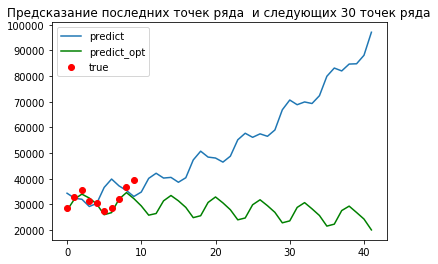

In [22]:
pred_dynamic = results.forecast(30)    
pred_dynamic_opt = results_opt.forecast(30)

plt.plot(pred_dynamic, label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(data_m['PJME_MW'].values[-8:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 30 точек ряда')
plt.legend()

plt.show()


In [24]:
from sklearn.metrics import r2_score 
adf_test = sm.tsa.stattools.adfuller(results_opt.resid)
print(adf_test)

(-6.732340923341601, 3.2719410361730107e-09, 14, 175, {'1%': -3.4682803641749267, '5%': -2.8782017240816327, '10%': -2.5756525795918366}, 3136.8436632584294)


ADF тест (adf_test[1] = 3.2719410361730107e-09) показывает, что пока остатки являются стационарным рядом,и хотя модель требует доработки, она отвечает на вопрос о поведении ряда во времени.

In [27]:
results_opt.save('rez_model.h5')